<a href="https://colab.research.google.com/github/cerasole/EnvironmentalRadioactivity/blob/main/Notebooks/SpectralFitHPGe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# High-Purity Germanium (HPGe)

In questo notebook analizziamo i dati presi in alcune acquisizioni di spettroscopia effettuate con un rivelatore a germanio.

Scaricheremo 1 file di testo contenente il tempo di acquisizione ove sta scritto "$MEAS_TIM" ed i valori dell'istogramma in ADC dei conteggi osservati.


In [1]:
!wget https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/fondo_open.Spe

--2025-03-05 11:21:02--  https://raw.githubusercontent.com/cerasole/EnvironmentalRadioactivity/main/Data/HPGe/fondo_open.Spe
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 164264 (160K) [text/plain]
Saving to: ‘fondo_open.Spe’

fondo_open.Spe      100%[===================>] 160.41K  --.-KB/s    in 0.03s   

2025-03-05 11:21:02 (4.76 MB/s) - ‘fondo_open.Spe’ saved [164264/164264]



In [2]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size = 16)

files = glob.glob("*.Spe")
print("File a disposizione:", files)

class Acq ():

    def __init__(self, filename = None):
        self.filename = filename
        self.adc = None
        self.energy = None
        self.counts, self.counts_err = None, None
        self.time = None
        if filename is not None:
            self.read()
        return

    def read(self):
        self.counts = np.loadtxt(self.filename, unpack = True, skiprows = 12, max_rows = 8191)
        self.adc = np.arange(len(self.counts))
        self.bin_edges = np.arange(-0.5, len(self.counts)+0.5, 1)
        self.time = np.loadtxt(self.filename, skiprows = 9, max_rows = 1)[1]
        self.counts_err = np.sqrt(self.counts)
        self.rate = self.counts / self.time
        self.rate_err = self.counts_err / self.time
        return

File a disposizione: ['fondo_open.Spe']


In [3]:
data = Acq("fondo_open.Spe")

In [5]:
data.counts

array([0., 0., 0., ..., 8., 6., 4.])

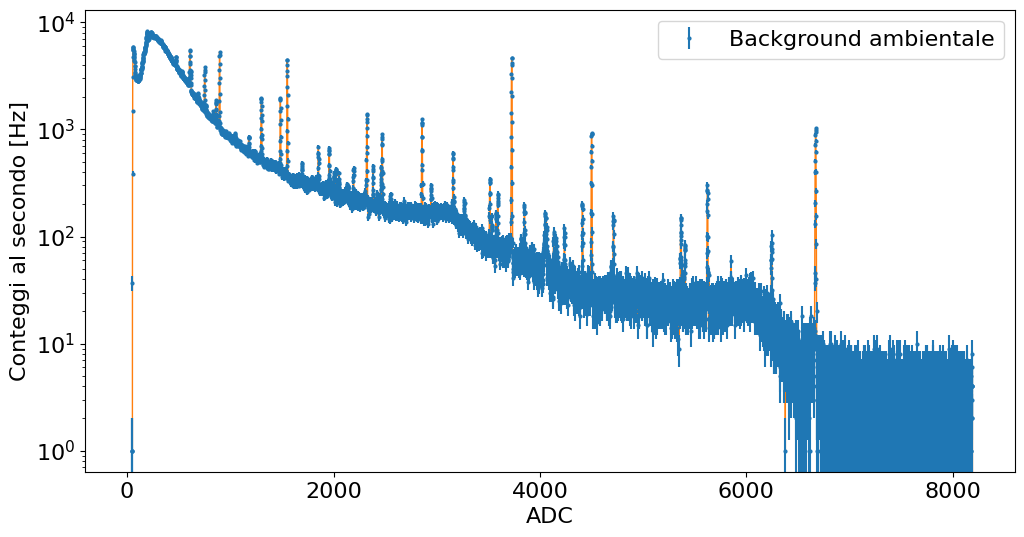

In [8]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.errorbar(x = data.adc, y = data.counts, yerr = data.counts_err, ls = "None", marker = "o", ms = 2, label = "Background ambientale")
ax.stairs(data.counts, data.bin_edges)
ax.set_yscale("log")
ax.set_xlabel("ADC")
ax.set_ylabel("Conteggi al secondo [Hz]")
ax.legend()

In [ ]:
fig, ax = plt.subplots(figsize = (12, 6))
ax.errorbar(x = data.adc, y = data.counts, yerr = data.counts_err, ls = "None", marker = "o", ms = 2, label = "Background ambientale")
ax.stairs(data.counts, data.bin_edges)
ax.set_yscale("log")
ax.set_xlabel("ADC")
ax.set_ylabel("Conteggi al secondo [Hz]")
ax.legend()